AIM 1: Variance and Covariance

1. Load the dataset 'diabetic_data.csv' using pandas
2. Calculate variance on the column 'num_med_proc'
    2.1. For the same column, also calculate standard deviation
    2.2. Do both variance and standard deviation give you the same understanding of the data?
3. Calculate covariance between the columns 'num_med_proc' and 'time_in_hospital'
    3.1. Calculate correlation between the same two variables
    3.2. Do both covariance and correlation give you the same understanding of the data?

In [1]:
import pandas as pd

df = pd.read_csv('diabetic_data.csv')

num_med_proc_var = df['num_med_proc'].var()
num_med_proc_std = df['num_med_proc'].std()

print(num_med_proc_var)
print(num_med_proc_std)
print(num_med_proc_var == num_med_proc_std ** 2)

df_cov = df[['num_med_proc', 'time_in_hospital']].cov()
df_corr = df[['num_med_proc', 'time_in_hospital']].corr()

print(df_cov)
print(df_corr)


556.7456310006831
23.595457846812025
True
                  num_med_proc  time_in_hospital
num_med_proc        556.745631         30.983682
time_in_hospital     30.983682          8.922030
                  num_med_proc  time_in_hospital
num_med_proc          1.000000          0.439615
time_in_hospital      0.439615          1.000000


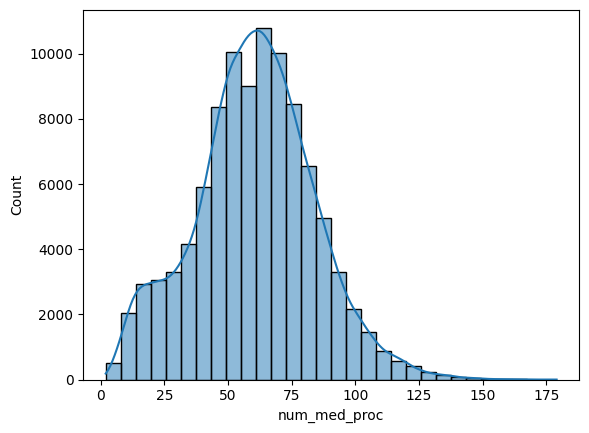

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['num_med_proc'], bins=30, kde=True)
plt.show()


AIM 2: Handle data with bimodal distribution. 

1. Create two separate normally distributed data of 100 items. One with mean 2 and the other with -2. Both will have an STD of 1.2
    1.1. You can try different values as well, as long as the result is a bimodal distribution
2. Combine the two datasets using concatenate() from NumPy library
3. Plot the histogram of this bimodal distribution. 
    3.1. You can use whatever library you want
4. Calculate kurtosis and skewness. 
    4.1. You can use whatever library you want. But I suggest you try SciPy's skew() and kurtosis().    

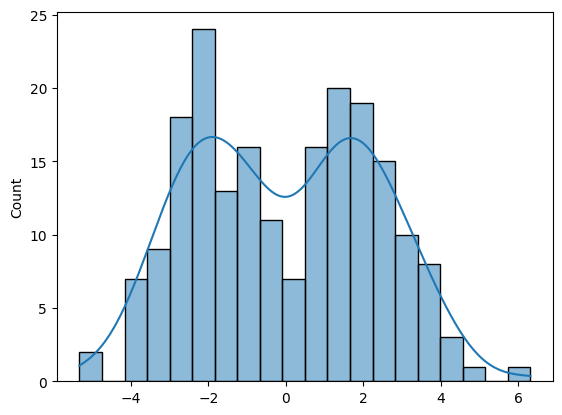

Kurtosis of data: -0.937101478030355
Skewness of data: 0.06630356906668743


In [3]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

data1 = np.random.normal(loc=-2, scale=1.2, size=100)
data2 = np.random.normal(loc=+2, scale=1.2, size=100)

data = np.concatenate((data1, data2))

sns.histplot(data, bins=20, kde=True)
plt.show()

print('Kurtosis of data:', kurtosis(data))
print('Skewness of data:', skew(data))


AIM 3: Test normality for the generated bimodal distribution

1. Visualize the given data with a Q-Q plot
2. Compute its normality using Shapiro-Wilk test
    2.1. Is the data normal? Why and how did you decide that? 
3. Repeat the normality test, but this time using Anderson-Darling Test
    3.1. Is the data normal? Why and how did you decide that?

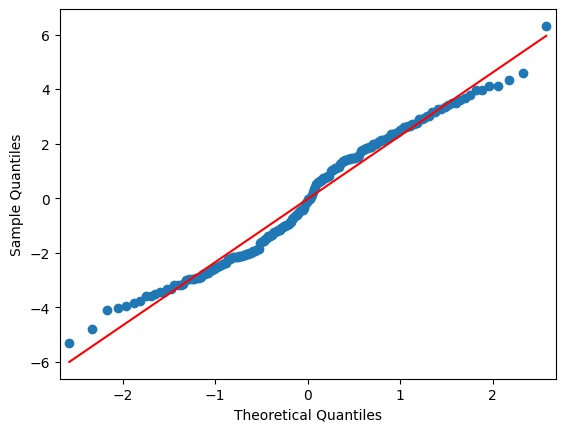

Shapiro-Wilk Test:
Statistic: 0.9728703484957539
P-value: 0.0006482853880537478

Anderson-Darling Test:
Statistic: 2.1715794795111947
Significance level 15.0%: 0.565
Significance level 10.0%: 0.644
Significance level 5.0%: 0.772
Significance level 2.5%: 0.901
Significance level 1.0%: 1.071
The data is not normally distributed (at the 5% significance level).



In [4]:
from scipy.stats import shapiro, anderson

sm.qqplot(data, line='s')
plt.show()

print('Shapiro-Wilk Test:')
stat, p_value = shapiro(data)
print('Statistic:', stat)
print('P-value:', p_value)
print()

print('Anderson-Darling Test:')
anderson_result = anderson(data, dist='norm')
print('Statistic:', anderson_result.statistic)
for sig_level, crit_value in zip(anderson_result.significance_level, anderson_result.critical_values):
    print(f"Significance level {sig_level}%: {crit_value}")
if anderson_result.statistic > anderson_result.critical_values[2]:
    print(f"The data is not normally distributed (at the {5}% significance level).")
else:
    print(f"The data is normally distributed (at the {5}% significance level).")
print()


AIM 4: Repeat AIM 2 and AIM 3 steps for normal data

1. Generate normally distirbuted data of 100 data items
2. Visualize it using Q-Q plot
3. Perform both Shapiro-Wilk and Anderson-Darling test on this data
    3.1. What from these tests tells you that the data is normal?
4. What happens when the data items is reduced to 30?

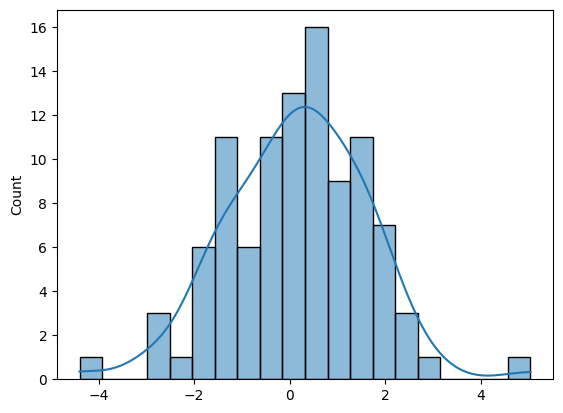

Kurtosis of data: 0.8177442921541802
Skewness of data: -0.0609793383907839



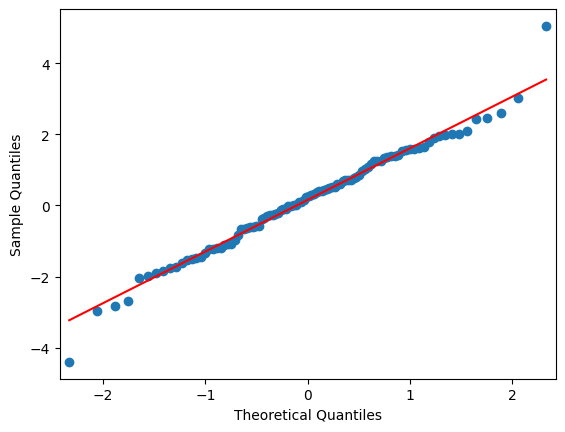

Shapiro-Wilk Test:
Statistic: 0.9878208584626677
P-value: 0.49509376883141276

Anderson-Darling Test:
Statistic: 0.25569561099028704
Significance level 15.0%: 0.555
Significance level 10.0%: 0.632
Significance level 5.0%: 0.759
Significance level 2.5%: 0.885
Significance level 1.0%: 1.053
The data is normally distributed (at the 5% significance level).



In [5]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew, shapiro, anderson
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

data = np.random.normal(loc=0, scale=1.5, size=100)

sns.histplot(data, bins=20, kde=True)
plt.show()

print('Kurtosis of data:', kurtosis(data))
print('Skewness of data:', skew(data))
print()

sm.qqplot(data, line='s')
plt.show()

print('Shapiro-Wilk Test:')
stat, p_value = shapiro(data)
print('Statistic:', stat)
print('P-value:', p_value)
print()

print('Anderson-Darling Test:')
anderson_result = anderson(data, dist='norm')
print('Statistic:', anderson_result.statistic)
for sig_level, crit_value in zip(anderson_result.significance_level, anderson_result.critical_values):
    print(f"Significance level {sig_level}%: {crit_value}")
if anderson_result.critical_values[2] < anderson_result.statistic:
    print(f"The data is not normally distributed (at the {5}% significance level).")
else:
    print(f"The data is normally distributed (at the {5}% significance level).")
print()


AIM 5: ANOVA on the supplied dataset

1. Load the diabetic_data.csv dataset. 
2. Find out the unique values under the 'race' columns
    2.1. These are your distinct groups
3. Visualize the continuous variable using first histogram and the Q-Q plot
    3.1. Does it look normally distributed?
4. Since the sample size is large, use Anderson-Darling test to objectively test if the data is normally distributed 
5. Next, using boxplot, visualize the 'num_med_proc' distribution across the different categories under the 'race' column
    5.1. Based on the visuals, we would like to test if there's difference in the number of medications and procedures for different categories of races. 
    5.2. What will be the Null Hypothesis and Alternative Hypothesis?
    H0 (Null Hypothesis): ??
    Ha (Alternative Hypothesis): ??
6. Use first ANOVA to test the hypothesis
    6.1. What is the result?
7. Now use Kruskal-Wallis Test, since the data is not normally distributed
    7.1. What is the result?
8. What can you conclude from the results of the above two tests, even though the data is non-normal?

In [6]:
df = pd.read_csv('diabetic_data.csv')

print(df.head().to_string())
print()

print(df.describe().to_string())
print()


   patient_nbr             race  gender      age weight  time_in_hospital  num_med_proc  number_diagnoses insulin
0      8222157        Caucasian  Female   [0-10)      ?                 1            42                 1      No
1     55629189        Caucasian  Female  [10-20)      ?                 3            77                 9      Up
2     86047875  AfricanAmerican  Female  [20-30)      ?                 2            29                 6      No
3     82442376        Caucasian    Male  [30-40)      ?                 2            61                 7      Up
4     42519267        Caucasian    Male  [40-50)      ?                 1            59                 5  Steady

        patient_nbr  time_in_hospital  num_med_proc  number_diagnoses
count  9.949300e+04      99493.000000  99493.000000      99493.000000
mean   5.456413e+07          4.398420     60.439770          7.439217
std    3.866461e+07          2.986977     23.595458          1.926064
min    1.350000e+02          1.0000

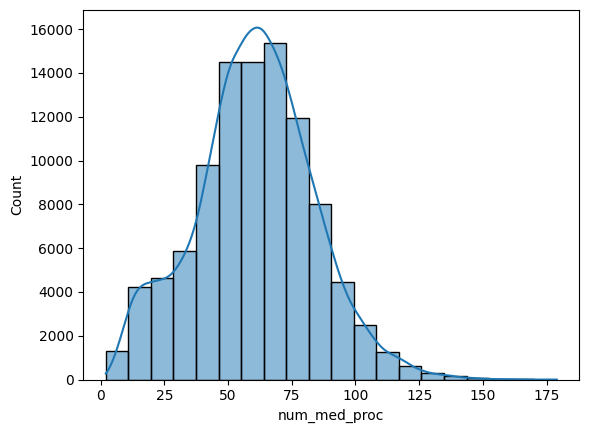

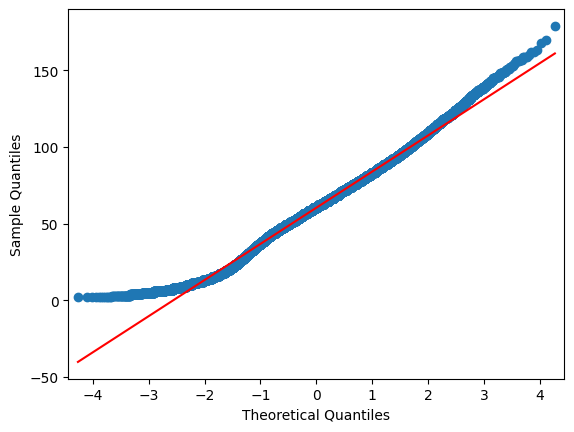

Anderson-Darling Test:
Statistic: 96.61245024697564
Significance level 15.0%: 0.576
Significance level 10.0%: 0.656
Significance level 5.0%: 0.787
Significance level 2.5%: 0.918
Significance level 1.0%: 1.092
The data is not normally distributed (at the 5% significance level).



In [7]:
data = df['num_med_proc']

sns.histplot(data, bins=20, kde=True)
plt.show()

sm.qqplot(data, line='s')
plt.show()

print('Anderson-Darling Test:')
anderson_result = anderson(data, dist='norm')
print('Statistic:', anderson_result.statistic)
for sig_level, crit_value in zip(anderson_result.significance_level, anderson_result.critical_values):
    print(f"Significance level {sig_level}%: {crit_value}")
if anderson_result.critical_values[2] < anderson_result.statistic:
    print(f"The data is not normally distributed (at the {5}% significance level).")
else:
    print(f"The data is normally distributed (at the {5}% significance level).")
print()


races: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']



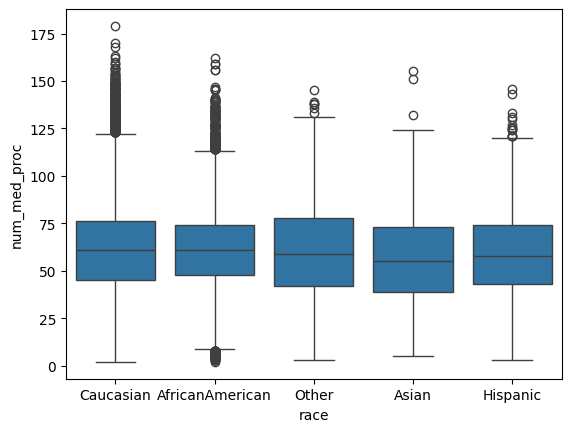

In [8]:
print('races:', df['race'].unique())
print()

sns.boxplot(df, x='race', y='num_med_proc')
plt.show()
